In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd

Hipparcos, operating from 1989-1993 was the first scientific satellite devoted to precision astrometry, to accurately measure the positions of stars. By measuring the parallax motion of stars on the sky as the Earth (and the satellite) moves in its orbit around the sun, Hipparcos could obtain accurate measures of distances to stars up to a few hundred parsecs (pc). We will use some data from the Hipparcos mission as our example data set, in order to plot a ‘colour-magnitude’ diagram of the general population of stars. We will see how to read the data into a Pandas dataframe, clean it of bad and low-precision data, and transform the data into useful values which we can plot.</p>
                

The file <code class="language-plaintext highlighter-rouge">hipparcos.txt</code>
                    (see the Lesson data 
                    <a href="https://github.com/philuttley/statistical-inference/tree/gh-pages/data/hipparcos.txt">
                        <strong>here</strong>
                    </a>
                    ) is a multivariate data-set containing a lot of information.  To start with you should look at the raw data file using your favourite text editor, Pythons native text input/output commands or the <code class="language-plaintext highlighter-rouge">more</code>
                    or <code class="language-plaintext highlighter-rouge">cat</code>
                    commands in the linux shell.  The file is formatted in a complex way, so that we need to skip the first 53 lines in order to get to the data.  We will also need to skip the final couple of lines.  Using the <code class="language-plaintext highlighter-rouge">pandas.read_csv</code>
                    command to read in the file, we specify <code class="language-plaintext highlighter-rouge">delim_whitespace=True</code>
                    since the values are separated by spaces not commas in this file, and we use the <code class="language-plaintext highlighter-rouge">skiprows</code>
                    and <code class="language-plaintext highlighter-rouge">skipfooter</code>
                    commands to skip the lines that do not correspond to data at the start and end of the file. We specify <code class="language-plaintext highlighter-rouge">engine='python'</code>
                    to avoid a warning message, and <code class="language-plaintext highlighter-rouge">index_col=False</code>
                    ensures that Pandas does not automatically assume that the integer ID values that are in the first column correspond to the indices in the array (this way we ensure direct correspondence of our index with our position in the array, so it is easier to diagnose problems with the data if we encounter any).

</p>
                <p>Note also that here we specify the names of our columns - we could also use names given in a specific header row in the file if one exists.  Here, the header row is not formatted such that the names are easy to use, so we give our own names for the columns.</p>
                <p>
                    Finally, we need to account for the fact that some of our values are not defined (in the parallax and its error, <code class="language-plaintext highlighter-rouge">Plx</code>
                    and <code class="language-plaintext highlighter-rouge">ePlx</code>
                    columns) and are denoted with <code class="language-plaintext highlighter-rouge">-</code>
                    .  This is done by setting <code class="language-plaintext highlighter-rouge">-</code>
                    to count as a <code class="language-plaintext highlighter-rouge">NaN</code>
                    value to Pandas, using <code class="language-plaintext highlighter-rouge">na_values='-'</code>
                    .  If we don’t include this instruction in the command, those columns will appear as strings (<code class="language-plaintext highlighter-rouge">object</code>
                    ) according to the <code class="language-plaintext highlighter-rouge">dtypes</code>
                    list.

In [2]:
hipparcos = pd.read_csv('hipparcos.txt', delim_whitespace=True, skiprows=53, skipfooter=2, engine='python',
names=['ID','Rah','Ram','Ras','DECd','DECm','DECs','Vmag','Plx','ePlx','BV','eBV'],
  index_col=False, na_values='-')

/var/folders/ky/hnfmqvvd74x03rjxm1q6hf580000gn/T/ipykernel_12228/286895166.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  hipparcos = pd.read_csv('hipparcos.txt', delim_whitespace=True, skiprows=53, skipfooter=2, engine='python',


 Note that Pandas automatically assigns a datatype (<code class="language-plaintext highlighter-rouge">dtype</code>
                    ) to each column based on the type of values it contains.  It is always good to check that this is working to assign the correct types (here using the <code class="language-plaintext highlighter-rouge">pandas.DataFrame.dtypes</code>
                    command), or errors may arise.  If needed, we can also assign a <code class="language-plaintext highlighter-rouge">dtype</code>
                    to each column using that variable in the <code class="language-plaintext highlighter-rouge">pandas.read_csv</code>
                    command.

In [3]:
print(hipparcos.dtypes,hipparcos.shape)

ID        int64
Rah       int64
Ram       int64
Ras     float64
DECd      int64
DECm      int64
DECs    float64
Vmag    float64
Plx     float64
ePlx    float64
BV      float64
eBV     float64
dtype: object (85509, 12)


Once we have read the data in, we should also clean it to remove <code class="language-plaintext highlighter-rouge">NaN</code>
                    values (use the Pandas <code class="language-plaintext highlighter-rouge">.dropna</code>
                    function). We add a print statement to see how many rows of data are left. We should then also remove parallax values ($p$) with large error bars $\Delta p$ use a conditional statement to select only items in the pandas array which satisfy $\Delta p/p \lt 0.05$. Then, let’s calculate the distance (distance in parsecs is $d=1/p$ where $p$ is the parallax in arcsec) and the absolute V-band magnitude ($V_{\rm abs} = V_{\rm mag} - 5\left[\log_{10}(d) -1\right]$), which is needed for the colour-magnitude diagram.
                </p>

In [7]:
hnew = hipparcos[:].dropna(how="any") # get rid of NaNs if present
print(len(hnew),"rows remaining")

# get rid of data with parallax error > 5 per cent
hclean = hnew[hnew.ePlx/np.abs(hnew.Plx) < 0.05]

hclean[['Rah','Ram','Ras','DECd','DECm','DECs','Vmag','Plx','ePlx','BV','eBV']] # Just use the values 
# we are going to need - avoids warning message

hclean['dist'] = 1.e3/hclean["Plx"] # Convert parallax to distance in pc
# Convert to absolute magnitude using distance modulus
hclean['Vabs'] = hclean.Vmag - 5.*(np.log10(hclean.dist) - 1.) # Note: larger magnitudes are fainter!

85446 rows remaining


/var/folders/ky/hnfmqvvd74x03rjxm1q6hf580000gn/T/ipykernel_12228/3905382915.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hclean['dist'] = 1.e3/hclean["Plx"] # Convert parallax to distance in pc
/var/folders/ky/hnfmqvvd74x03rjxm1q6hf580000gn/T/ipykernel_12228/3905382915.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hclean['Vabs'] = hclean.Vmag - 5.*(np.log10(hclean.dist) - 1.) # Note: larger magnitudes are fainter!


You will probably see a <code class="language-plaintext highlighter-rouge">SettingWithCopyWarning</code>
                    on running the cell containing this code. It arises from the fact that we are producing output to the same dataframe that we are using as input. We get a warning because in some situations this kind of operation is dangerous - we could modify our dataframe in a way that affects things in unexpected ways later on. However, here we are safe, as we are creating a new column rather than modifying any existing column, so we can proceed, and ignore the warning.
               

Multivariate data can be shown by plotting each variable against each other variable (with histograms plotted along the diagonal). This is quite difficult to do in matplotlib. It is possible by plotting on a grid and making sure to keep the indices right, but doing so can be quite instructive. We will first demonstrate this (before you try it yourself using the Hipparcos data) using some multi-dimensional fake data drawn from normal distributions, using numpy’s <code class="language-plaintext highlighter-rouge">random.multivariate_normal</code>
                    function. Note that besides the size of the random data set to be generated, the variable takes two arrays as input, a 1-d array of mean values and a 2-d matrix of covariances, which defines the correlation of each axis value with the others. To see the effect of the covariance matrix, you can experiment with changing it in the cell below.
              

Note that the <code class="language-plaintext highlighter-rouge">random.multivariate.normal</code>
                    function may (depending on the choice of parameter values)throw up a warning <code class="language-plaintext highlighter-rouge">covariance is not positive-semidefinite</code>
                    .  For our simple simulation to look at how to plot multi-variate data, this is not a problem.  However, such warnings should be taken seriously if you are using the simulated data or covariance to do a statistical test (e.g. Monte Carlo simulation to fit a model where different observables are random but correlated as defined by a covariance matrix).  As usual, more information can be found via an online search.
               

In [14]:
sps.multivariate_normal.rvs?

Signature: sps.multivariate_normal.rvs(mean=None, cov=1, size=1, random_state=None)
Docstring:
Draw random samples from a multivariate normal distribution.

Parameters
----------
mean : array_like, default: ``[0]``
    Mean of the distribution.
cov : array_like or `Covariance`, default: ``[1]``
    Symmetric positive (semi)definite covariance matrix of the distribution.
allow_singular : bool, default: ``False``
    Whether to allow a singular covariance matrix. This is ignored if `cov` is
    a `Covariance` object.
size : integer, optional
    Number of samples to draw (default 1).
seed : {None, int, np.random.RandomState, np.random.Generator}, optional
    Used for drawing random variates.
    If `seed` is `None`, the `~np.random.RandomState` singleton is used.
    If `seed` is an int, a new ``RandomState`` instance is used, seeded
    with seed.
    If `seed` is already a ``RandomState`` or ``Generator`` instance,
    then that object is used.
    Default is `None`.

Returns
-------


In [25]:
rand_data = sps.multivariate_normal.rvs(mean=[1,20,60,40], cov=[[3,2,1,3],[2,2,1,4],[1,1,3,2],[3,4,2,1]], 
                                        size=100)

ValueError: The input matrix must be symmetric positive semidefinite.

In [21]:
eigvals = np.linalg.eigvals([[3,2,1,3],
                             [2,2,1,4],
                             [1,1,3,2],
                             [3,4,2,1]])

eigvals # shows why not symmetric positive semidefinite

array([ 9.51225997, -1.70736005,  0.78722779,  1.40787229])

In [20]:
# just use two functions separately
rand_data = sps.multivariate_normal(mean=[1,20,60,40], cov=[[3,2,1,3],[2,2,1,4],[1,1,3,2],[3,4,2,1]])
# 


ValueError: The input matrix must be symmetric positive semidefinite.

In [32]:
# just trying out something to see if I can get the normal function to work. 

cov = [[3,1,1,2], 
       [1,2,2,1],
       [1,2,3,1],
       [2,1,1,2]]

rv = sps.multivariate_normal(mean=[1,20,60,40], cov=cov)
rand_data_again = rv.rvs(size=100)

In [35]:
rand_data_again.shape

(100, 4)

This means that for each of the 100 points, there are $(x_1, x_2, x_3, x_4)$, like a four-vector. We can't visualize 4 dimensions, so these scatter plot matrices are one way we can try to show the relative projections. 

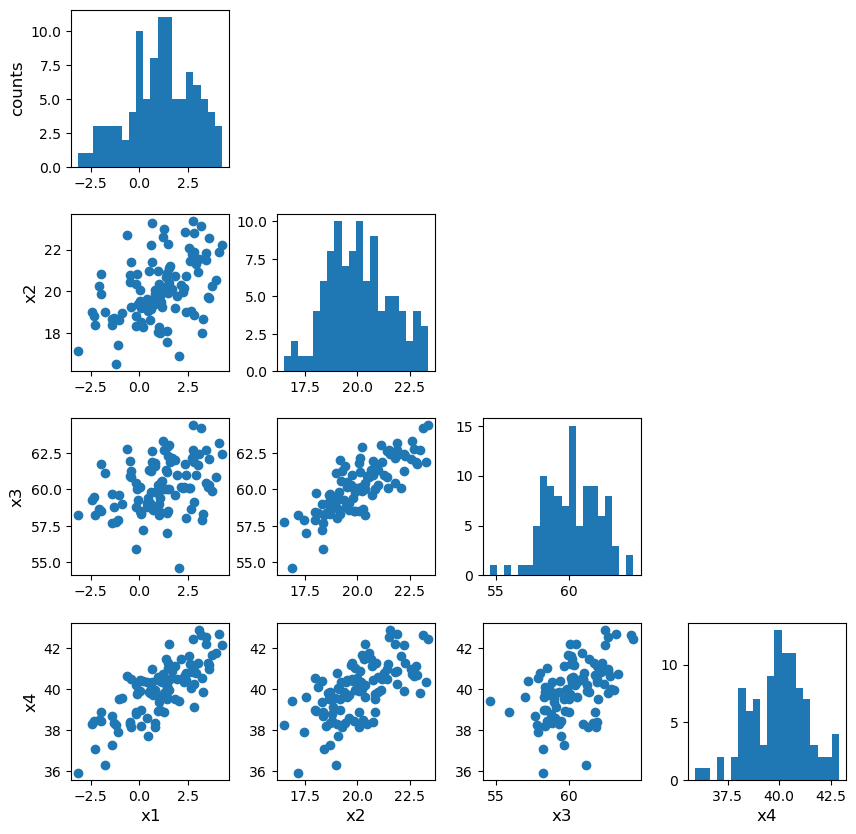

In [34]:
# plotting 

ndims = rand_data_again.shape[1]
labels = ['x1','x2','x3','x4']
fig, axes = plt.subplots(4,4,figsize=(10,10))
fig.subplots_adjust(wspace=0.3,hspace=0.3)

for i in range(ndims): ## y dimension of grid
    for j in range(ndims): ## x dimension of grid
                   # IF i = j = ON THE DIAGONAL, showing 1D distributions:
        if i == j: # mean, variance, shape (kind of how does variable look by itself)
            axes[i,j].hist(rand_data_again[:,i], bins=20)

        elif i > j: # lower triangle panels (thing bottom, where x > y)
            axes[i,j].scatter(rand_data_again[:,j], rand_data_again[:,i])
        else: # else is just if i < j, which would just reflect the bottom
            axes[i,j].axis('off') # so it's turned off
        if j == 0:
            if i == j:
                axes[i,j].set_ylabel('counts',fontsize=12)
            else:
                axes[i,j].set_ylabel(labels[i],fontsize=12)
        if i == 3:
            axes[i,j].set_xlabel(labels[j],fontsize=12)    
plt.show()

Also just trying with seaborn: 

In [38]:
df = pd.DataFrame(rand_data_again, columns = ['x1', 'x2', 'x3', 'x4'])
df

,x1,x2,x3,x4
0,2.777107,23.365608,64.391536,42.452174
1,-2.043028,20.264727,58.671035,38.509626
2,1.399195,20.114500,61.215339,40.221262
3,-1.077955,17.447509,57.865745,37.936692
4,2.399636,20.748346,60.961069,40.446504
...,...,...,...,...
95,2.640192,19.077743,58.630985,40.067762
96,3.406152,21.817622,60.456618,42.232062
97,-0.149638,18.361034,55.917209,38.882425
98,1.066784,18.009422,58.414532,38.967616


In [40]:
import seaborn as sns
mask = np.zeros_like(df)

mask[np.triu_indices_from(mask)] = True

sns.pairplot(df, mask=mask)

sns.heatmap(matrix,center = 0, fmt = ".3f", square = True, annot= True, Linewidth = .3, mask=mask);

TypeError: pairplot() got an unexpected keyword argument 'mask'

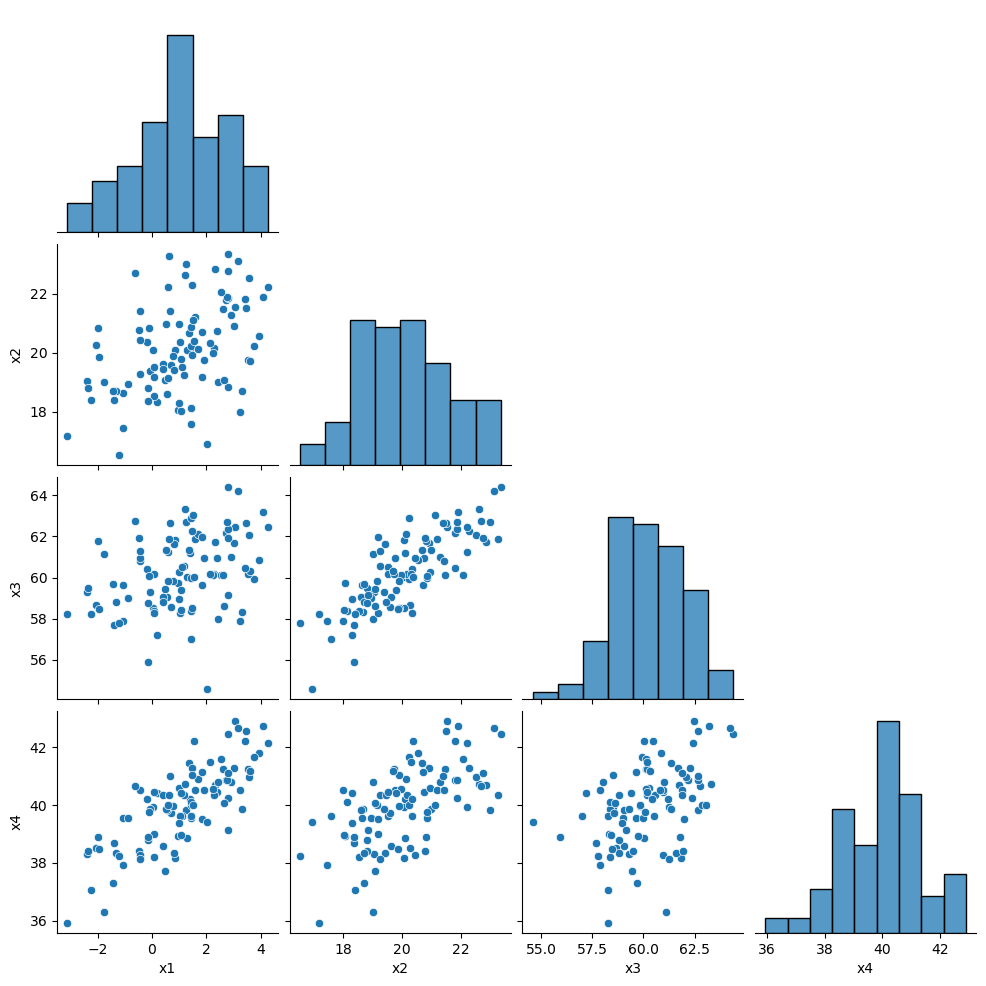

In [49]:
sns.pairplot(df, corner=True) # so need to change this corner param
# then need to enforce axes for the diagonal
axes[0,0,0,0]

In [ ]:
sns.pairplot(df, diag)

(26, 5)


In [47]:
sns.pairplot?

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you